## Multiple Linear Regression Assignment

In [240]:
import warnings
warnings.filterwarnings('ignore')

In [241]:
import numpy as np
import pandas as pd

### [I] Reading and Understanding the Data

In [242]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [243]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 1) Inspect the dataset

In [244]:
df.shape

(205, 26)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [246]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 2) Changing CarName to CarCompany as required in the problem statement

In [247]:
df['CarCompany'] = df['CarName'].str.split().str[0]
df['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

In [248]:
df.drop("CarName", axis=1,inplace=True)

In [249]:
df['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
porcshce        1
toyouta         1
Nissan          1
mercury         1
vokswagen       1
Name: CarCompany, dtype: int64

#### 3) Data Cleaning - Correcting Discrepancies in the CarCompany column

In [250]:
df['CarCompany'] = df['CarCompany'].str.replace('vw','volkswagen')
df['CarCompany'] = df['CarCompany'].str.replace('vokswagen','volkswagen')
df['CarCompany'] = df['CarCompany'].str.replace('porcshce','porsche')
df['CarCompany'] = df['CarCompany'].str.replace('toyouta','toyota')
df['CarCompany'] = df['CarCompany'].str.replace('Nissan','nissan')
df['CarCompany'] = df['CarCompany'].str.replace('maxda','mazda')


In [251]:
df['CarCompany'].value_counts()


toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

#### 4) Checking for null values

In [252]:
nullsFields = round((df.isnull().sum() / len(df) ) * 100, 2)
nullsFields.loc[nullsFields > 0].sort_values()
nullsFields

car_ID              0.0
symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
CarCompany          0.0
dtype: float64

#### 5) Checking for duplicates

In [313]:
df.duplicated().sum()

0

#### 6) Car_id doesnot give anything to our analysis. Therefore dropping that.

In [253]:
df.drop("car_ID", axis=1,inplace=True)

backup=df

### [II] Visualise the data

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Numerical Pairplot

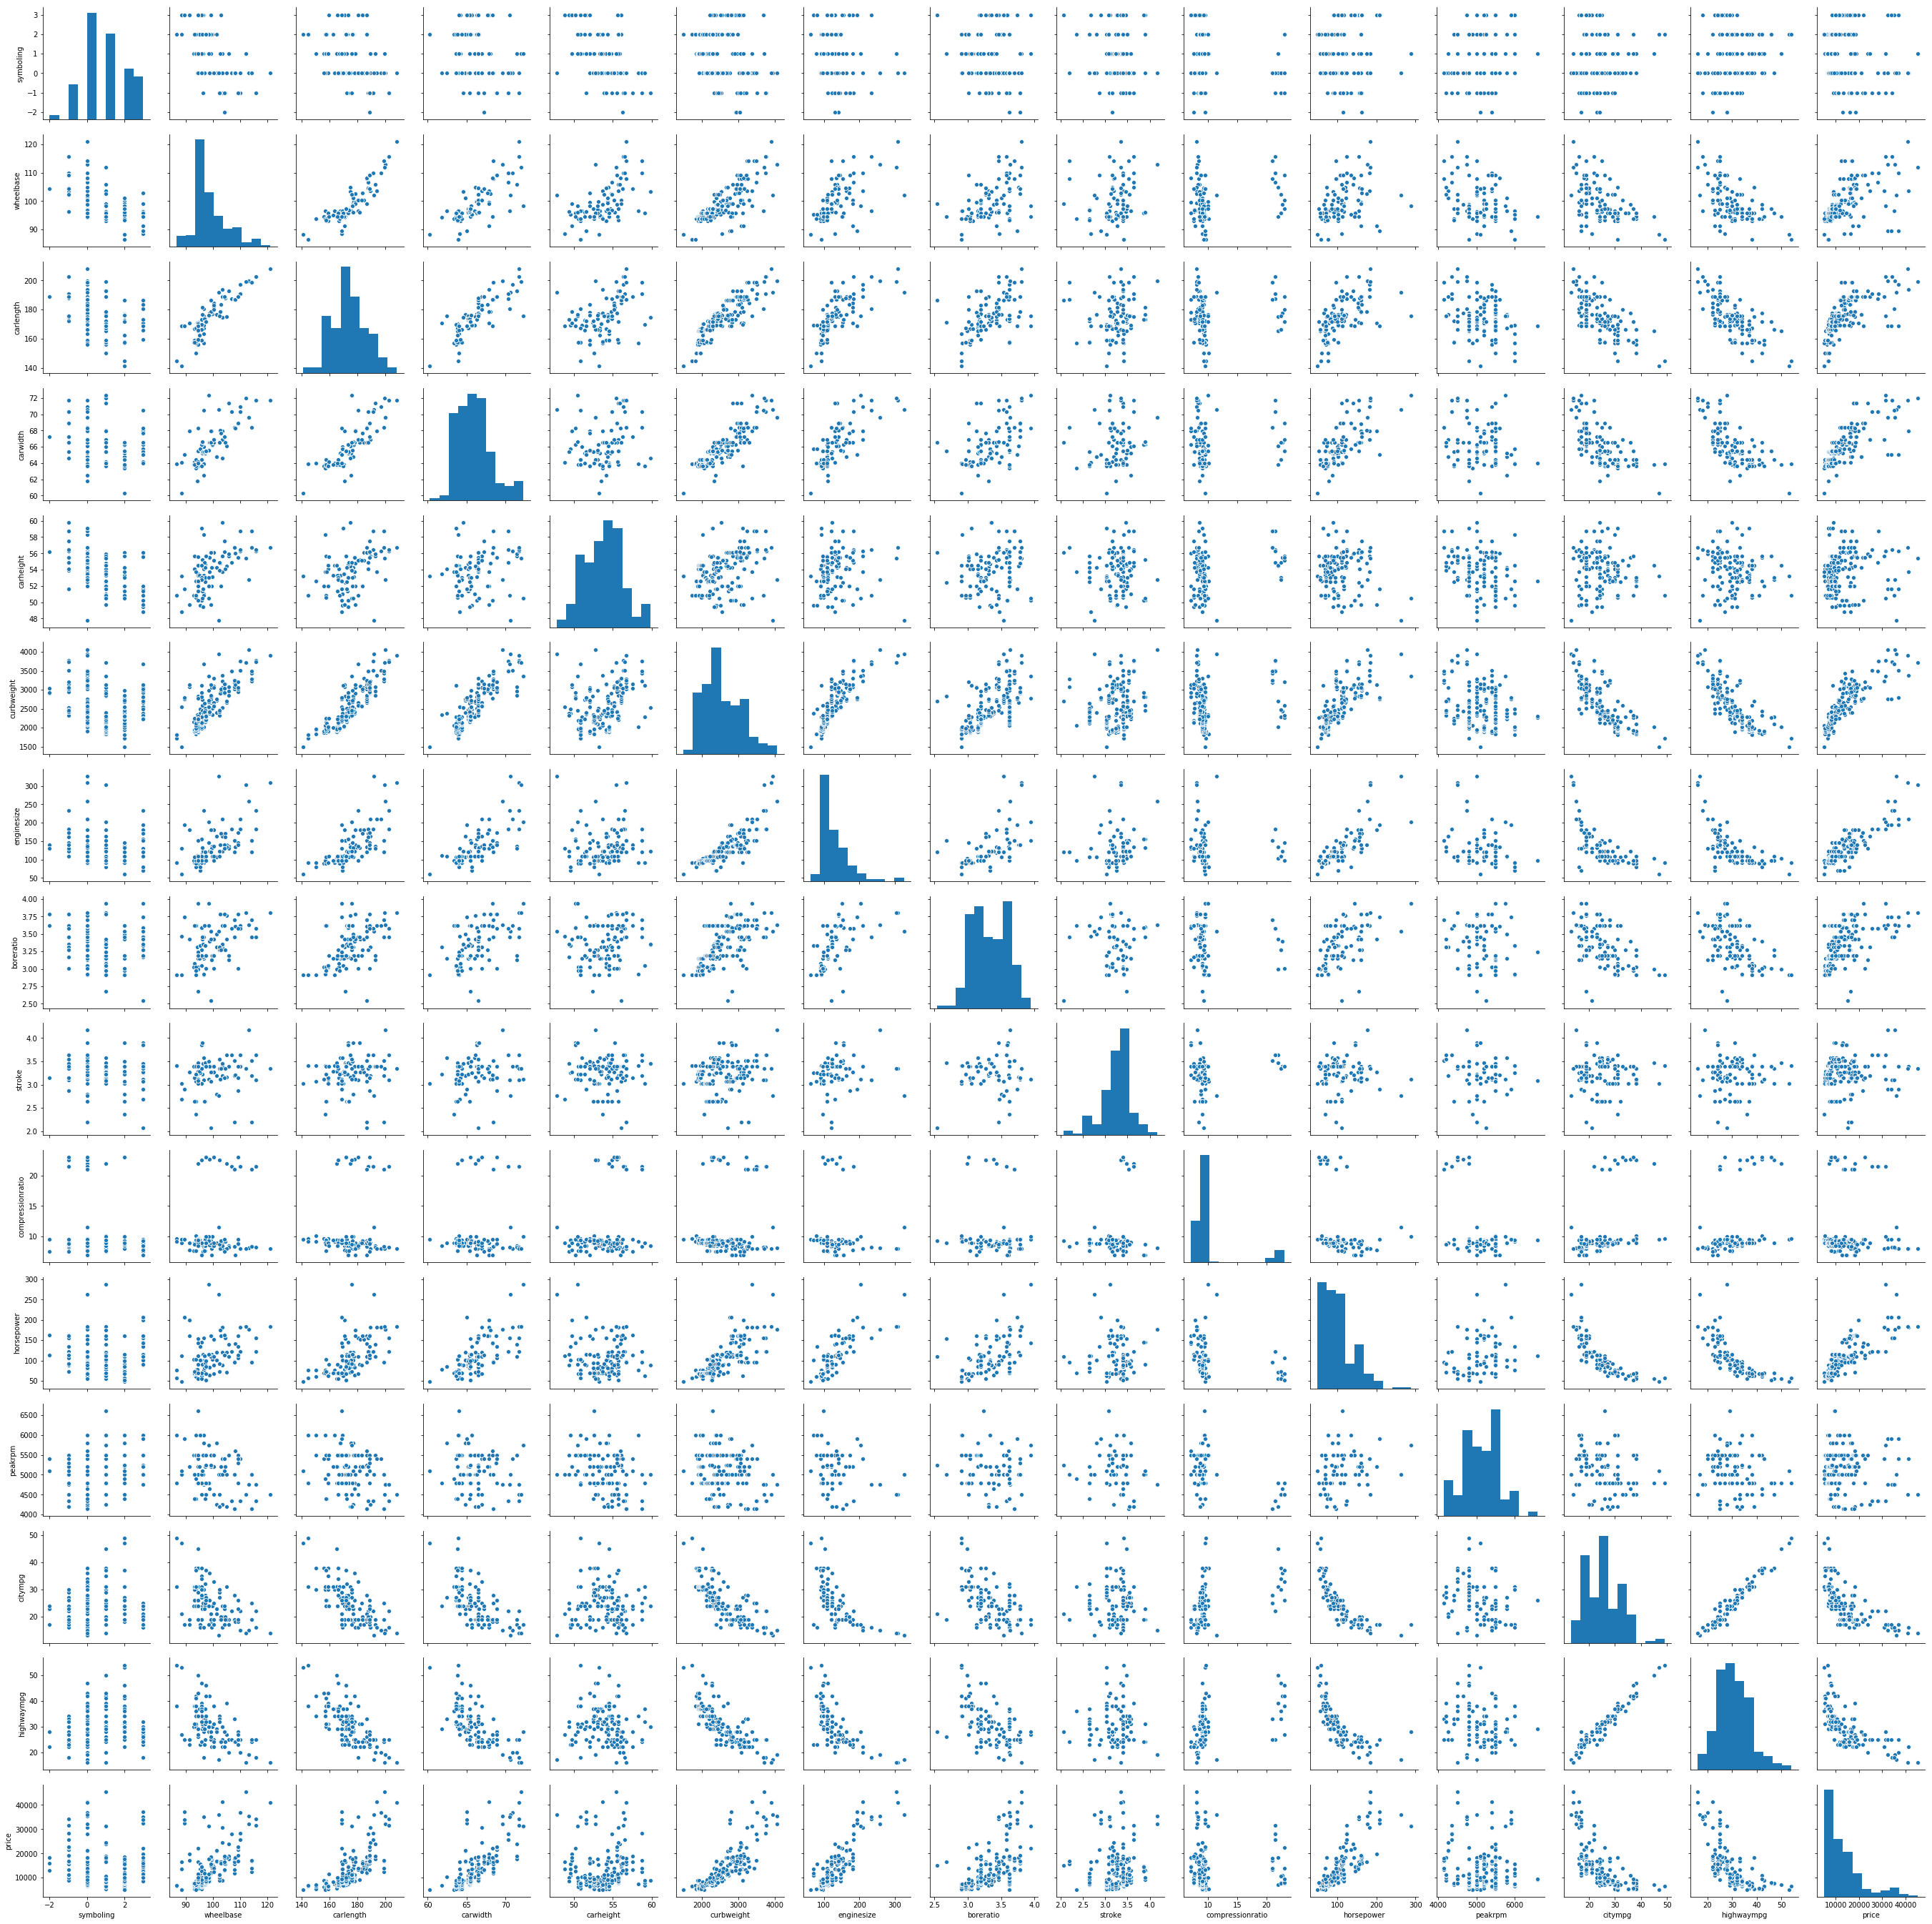

In [256]:
sns.pairplot(df)
plt.show()

#### 2) Visualising Categorical values

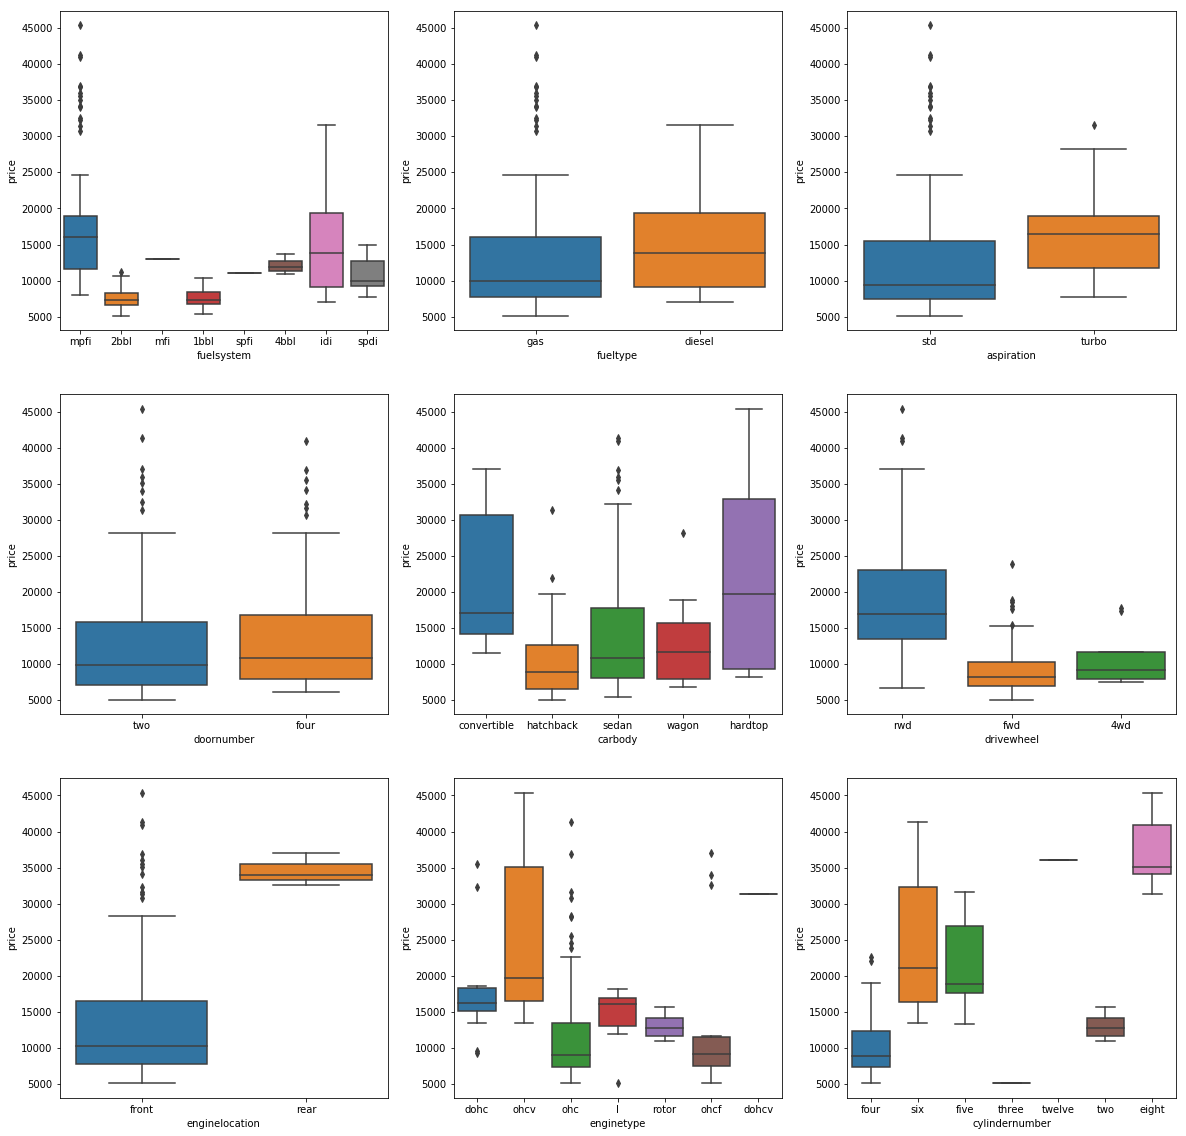

In [257]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='fuelsystem',y='price',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='fueltype',y='price',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='aspiration',y='price',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='doornumber',y='price',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='carbody',y='price',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='drivewheel',y='price',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='enginelocation',y='price',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='enginetype',y='price',data=df)

plt.subplot(3,3,9)
sns.boxplot(x='cylindernumber',y='price',data=df)

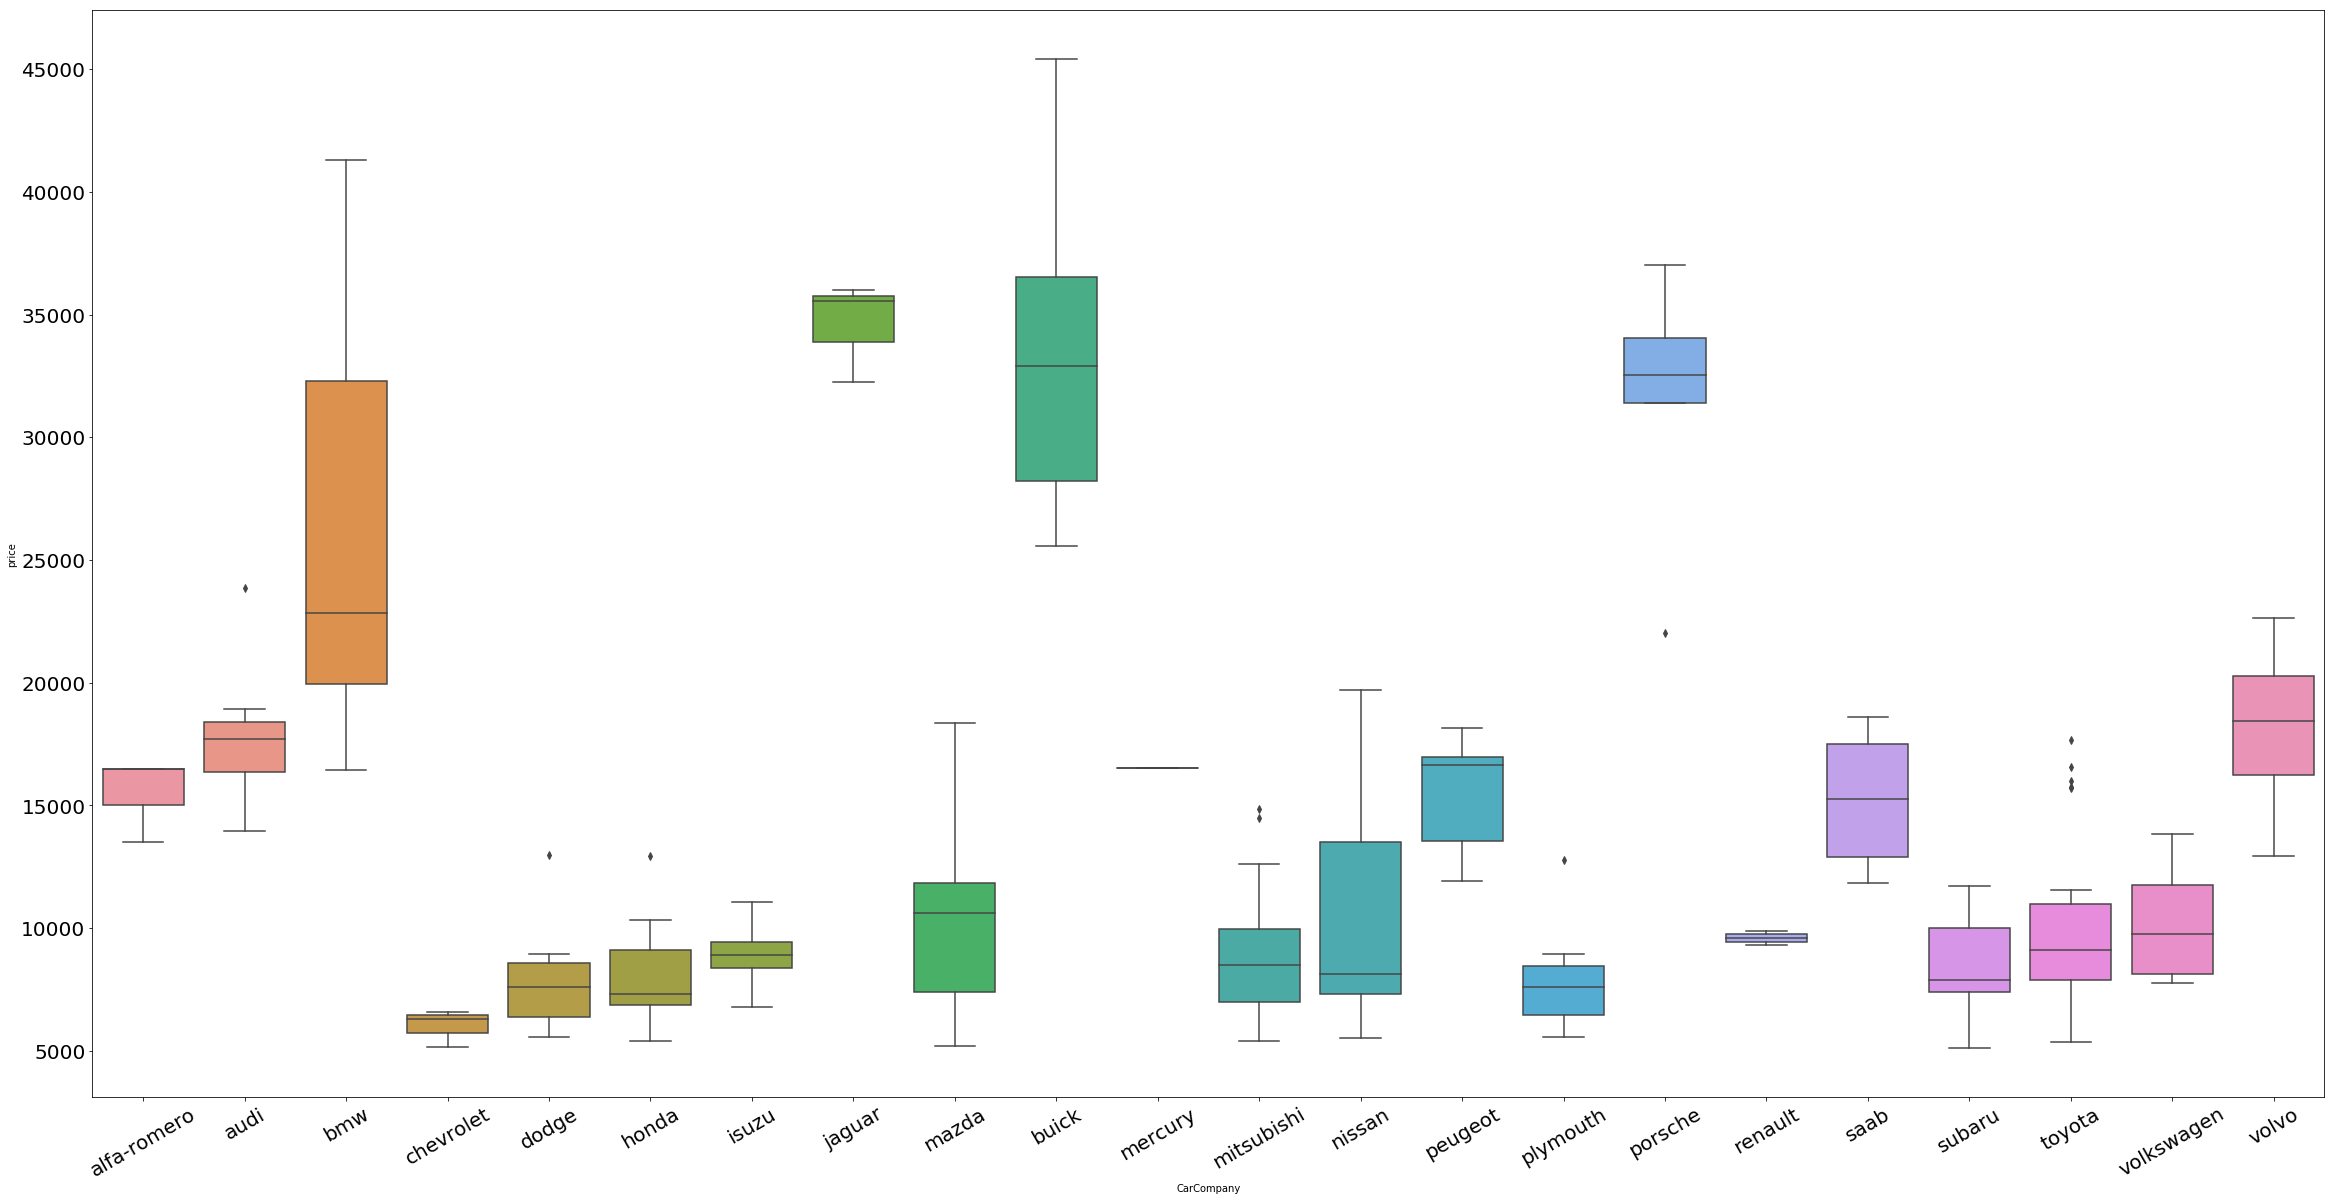

In [258]:
plt.figure(figsize=(40,20))
ax=sns.boxplot(x='CarCompany',y='price',data=df)
ax.tick_params(axis='x', labelsize=20,rotation=30)
ax.tick_params(axis='y', labelsize=20)

#### 3) Showing relation between 2 categorical variables

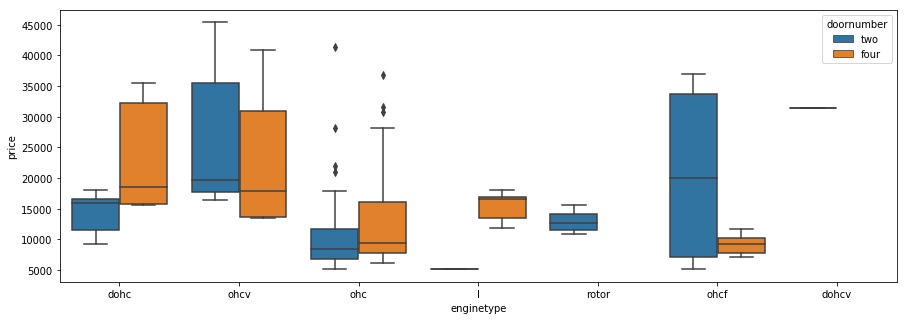

In [259]:
plt.figure(figsize=(15,5))
sns.boxplot(x='enginetype',y='price',hue ='doornumber',data=df)
plt.show()

### [III] DATA PREPARATION

#### 1) Function created to make Dummy Variables

In [260]:
def createDummy(col):
    global df
    dummies=pd.get_dummies(df[col],drop_first=True)     
    df = pd.concat([df,dummies],axis=1)
    df.drop(col, axis=1,inplace=True)

#df=backup

In [261]:
createDummy('fueltype')
createDummy('aspiration')
createDummy('doornumber')
createDummy('carbody')
createDummy('drivewheel')
createDummy('enginelocation')
createDummy('enginetype')
createDummy('cylindernumber')
createDummy('fuelsystem')
createDummy('CarCompany')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
gas                 205 non-null uint8
turbo               205 non-null uint8
two                 205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
fwd                 2

### [IV] Building Model

#### 1) Splitting into train and test

In [263]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.7, test_size =0.3, random_state = 100)

#### 2) Scaling

In [264]:
from sklearn.preprocessing import MinMaxScaler

In [265]:
scaler = MinMaxScaler()

In [266]:
#Apply Scaling to numerical variables 
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [267]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [270]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3) CHECKING CORRELATION

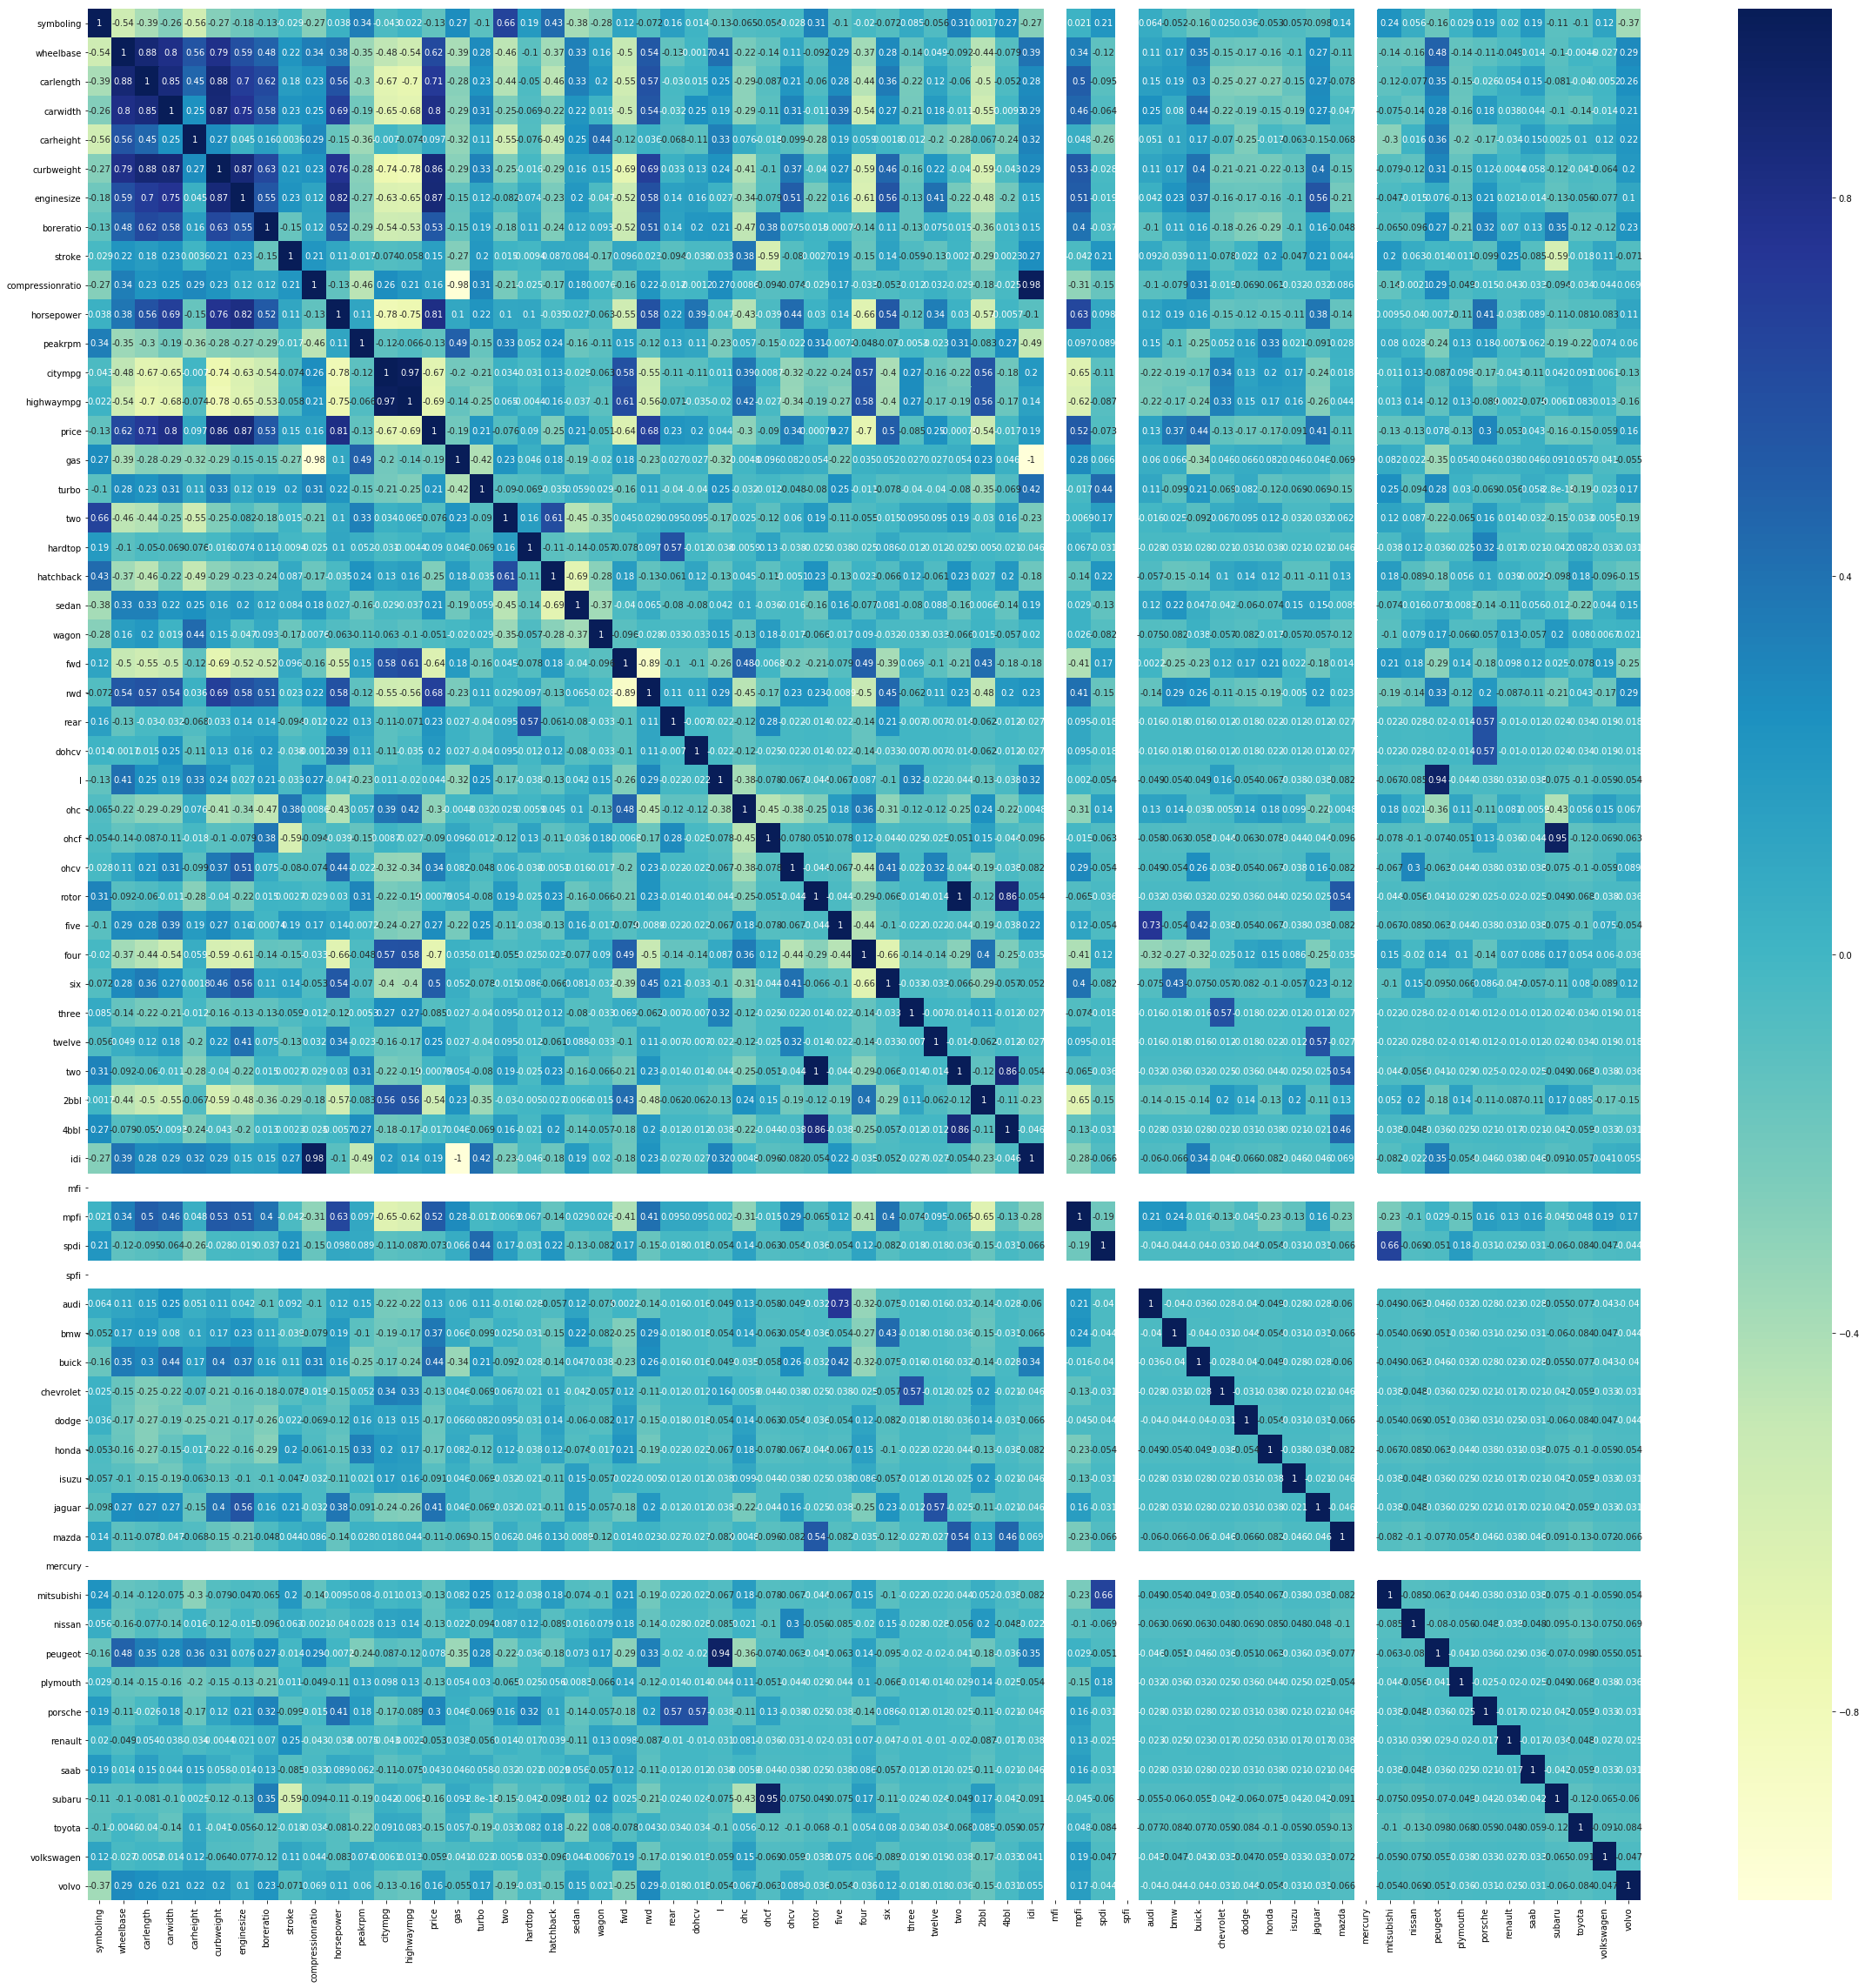

In [269]:
plt.figure(figsize = (40,40))
sns.heatmap(df_train.corr(),annot= True, cmap='YlGnBu')
plt.show()

#### Most positive correlation - enginesize, curbweight, carwidth

#### Most negative correlation - four, highwaympg, citympg

####  4)  Plotting Scatter plots for most correlated variables

Text(0.5, 0, 'city mpg')

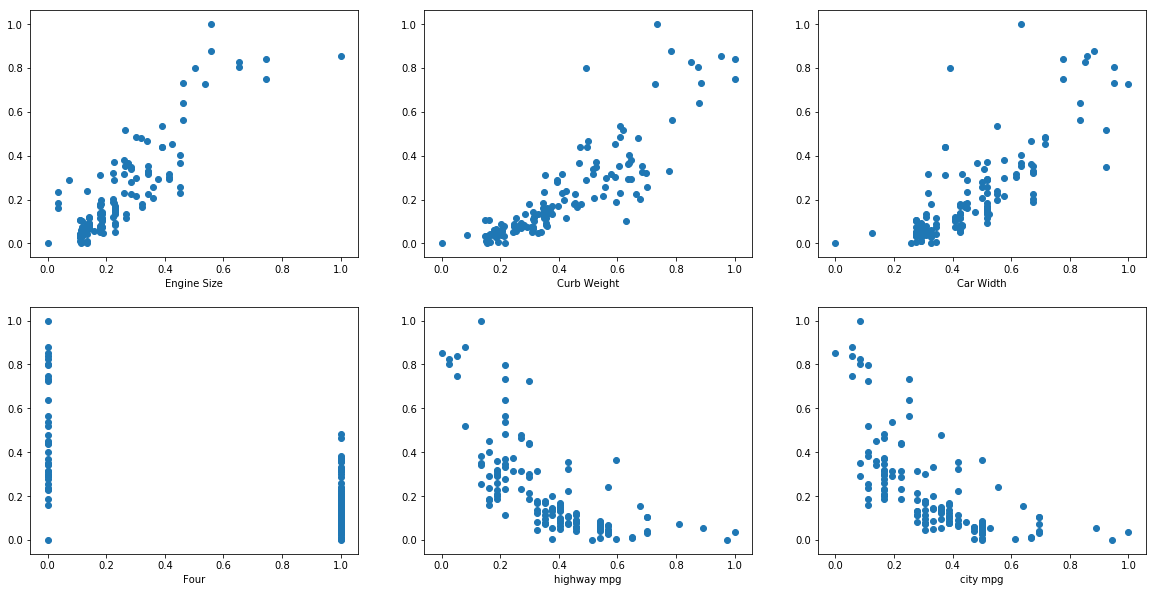

In [271]:
plt.figure(figsize = [20,10])

plt.subplot(2,3,1)
plt.scatter(df_train.enginesize,df_train.price)
plt.xlabel('Engine Size')

plt.subplot(2,3,2)
plt.scatter(df_train.curbweight,df_train.price)
plt.xlabel('Curb Weight')

plt.subplot(2,3,3)
plt.scatter(df_train.carwidth,df_train.price)
plt.xlabel('Car Width')

plt.subplot(2,3,4)
plt.scatter(df_train.four,df_train.price)
plt.xlabel('Four')

plt.subplot(2,3,5)
plt.scatter(df_train.highwaympg,df_train.price)
plt.xlabel('highway mpg')

plt.subplot(2,3,6)
plt.scatter(df_train.citympg,df_train.price)
plt.xlabel('city mpg')


#### 5) Dividing into X and Y sets for model building

In [272]:
y_train = df_train.pop('price')
x_train = df_train

Building the Model

Stats Model fitting all 6 variables shown above

In [273]:
x_train_lm = x_train[['enginesize', 'curbweight', 'carwidth', 'four', 'highwaympg', 'citympg' ]]

In [274]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const        -0.032432
enginesize    0.551981
curbweight    0.245031
carwidth      0.204379
four         -0.104087
highwaympg    0.187970
citympg      -0.200762
dtype: float64

In [275]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.49e-52
Time:                        23:00:57   Log-Likelihood:                 148.56
No. Observations:                 143   AIC:                            -283.1
Df Residuals:                     136   BIC:                            -262.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0324      0.050     -0.650      0.5

#### This shows a high values of p values for highwaympg and citympg but the R2 value is good.

#### As there are lot of variables invovled, its best to do a combination of RFE and statsmodel here

### [V] RFE model

#### 1) Building the model (Model 1)

In [276]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [277]:
#Running RFE with output varible equal to 25
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm,25)
rfe = rfe.fit(x_train, y_train)


In [278]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 34),
 ('wheelbase', False, 2),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 22),
 ('highwaympg', False, 11),
 ('gas', False, 14),
 ('turbo', True, 1),
 ('two', False, 28),
 ('hardtop', False, 16),
 ('hatchback', False, 15),
 ('sedan', False, 17),
 ('wagon', False, 18),
 ('fwd', False, 39),
 ('rwd', False, 26),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 30),
 ('ohcf', True, 1),
 ('ohcv', False, 24),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 13),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 19),
 ('4bbl', False, 25),
 ('idi', False, 9),
 ('mfi', False, 31),
 ('mpfi', False, 33),
 ('spdi', False, 29),
 ('spfi', False, 32),
 ('audi', False, 

In [279]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'turbo', 'rear', 'dohcv', 'l', 'ohcf', 'rotor',
       'five', 'four', 'three', 'twelve', 'two', 'bmw', 'mitsubishi',
       'peugeot', 'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

In [280]:
x_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'citympg', 'highwaympg', 'gas', 'two', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'ohc', 'ohcv', 'six', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'nissan', 'plymouth',
       'renault', 'toyota', 'volkswagen'],
      dtype='object')

#### 2) Checking Stats of the built model

In [281]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)

In [282]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [283]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.25e-70
Time:                        23:01:26   Log-Likelihood:                 242.96
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                     119   BIC:                            -366.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3167      0.043     -7.449      0.0

#### Now we will manually start reducing variables until P value of variable is below 0.05 and VIF value is below 5

#### 3) Checking for MultiCollinearity

In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,rotor,inf
9,rear,inf
25,subaru,inf
22,peugeot,inf
19,two,inf
16,three,inf
12,ohcf,inf
11,l,inf
0,const,109.860000
3,enginesize,41.570000


#### From the above VIF table, it looks like lot of variables have high (infinite) collinearity.


#### It would be a good practise to drop them first

#### 4) Correlation Matrix and Heatmap

In [285]:
correlation_x_train= x_train_rfe.corr()
correlation_x_train

,const,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,turbo,rear,...,twelve,two,two,bmw,mitsubishi,peugeot,porsche,saab,subaru,volvo
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,1.000000,0.873884,0.754925,0.580962,0.233631,0.685051,-0.188153,3.070265e-01,-0.031943,...,0.181043,-0.245854,-0.010753,0.080001,-0.075155,0.281075,0.178696,0.043796,-1.027447e-01,0.209624
curbweight,NaN,0.873884,1.000000,0.865102,0.625759,0.209277,0.759759,-0.278156,3.256339e-01,0.033473,...,0.218088,-0.251023,-0.040089,0.165348,-0.078872,0.310317,0.115210,0.057941,-1.150613e-01,0.196516
enginesize,NaN,0.754925,0.865102,1.000000,0.545157,0.228768,0.817916,-0.265202,1.150503e-01,0.141901,...,0.413197,-0.081539,-0.217946,0.229151,-0.046985,0.076266,0.206896,-0.014190,-1.269648e-01,0.103578
boreratio,NaN,0.580962,0.625759,0.545157,1.000000,-0.152836,0.518307,-0.287938,1.866387e-01,0.139578,...,0.075047,-0.183979,0.014733,0.110709,-0.064959,0.272686,0.318523,0.130910,3.469521e-01,0.228723
stroke,NaN,0.233631,0.209277,0.228768,-0.152836,1.000000,0.106454,-0.017408,1.995801e-01,-0.094329,...,-0.132053,0.014726,0.002685,-0.039245,0.199658,-0.013733,-0.098740,-0.084639,-5.890804e-01,-0.070604
horsepower,NaN,0.685051,0.759759,0.817916,0.518307,0.106454,1.000000,0.111035,2.228997e-01,0.221431,...,0.338032,0.101487,0.029774,0.187407,0.009477,-0.007241,0.407216,0.089177,-1.101059e-01,0.113391
peakrpm,NaN,-0.188153,-0.278156,-0.265202,-0.287938,-0.017408,0.111035,1.000000,-1.524238e-01,0.134722,...,-0.022760,0.333523,0.307708,-0.104030,0.079819,-0.243677,0.179047,0.062042,-1.932046e-01,0.059606
turbo,NaN,0.307027,0.325634,0.115050,0.186639,0.199580,0.222900,-0.152424,1.000000e+00,-0.039559,...,-0.039559,-0.089642,-0.079968,-0.098653,0.251126,0.279715,-0.069007,0.057505,-2.832792e-18,0.172642
rear,NaN,-0.031943,0.033473,0.141901,0.139578,-0.094329,0.221431,0.134722,-3.955939e-02,1.000000,...,-0.007042,0.094565,-0.014236,-0.017562,-0.021748,-0.020428,0.573270,-0.012284,-2.422508e-02,-0.017562


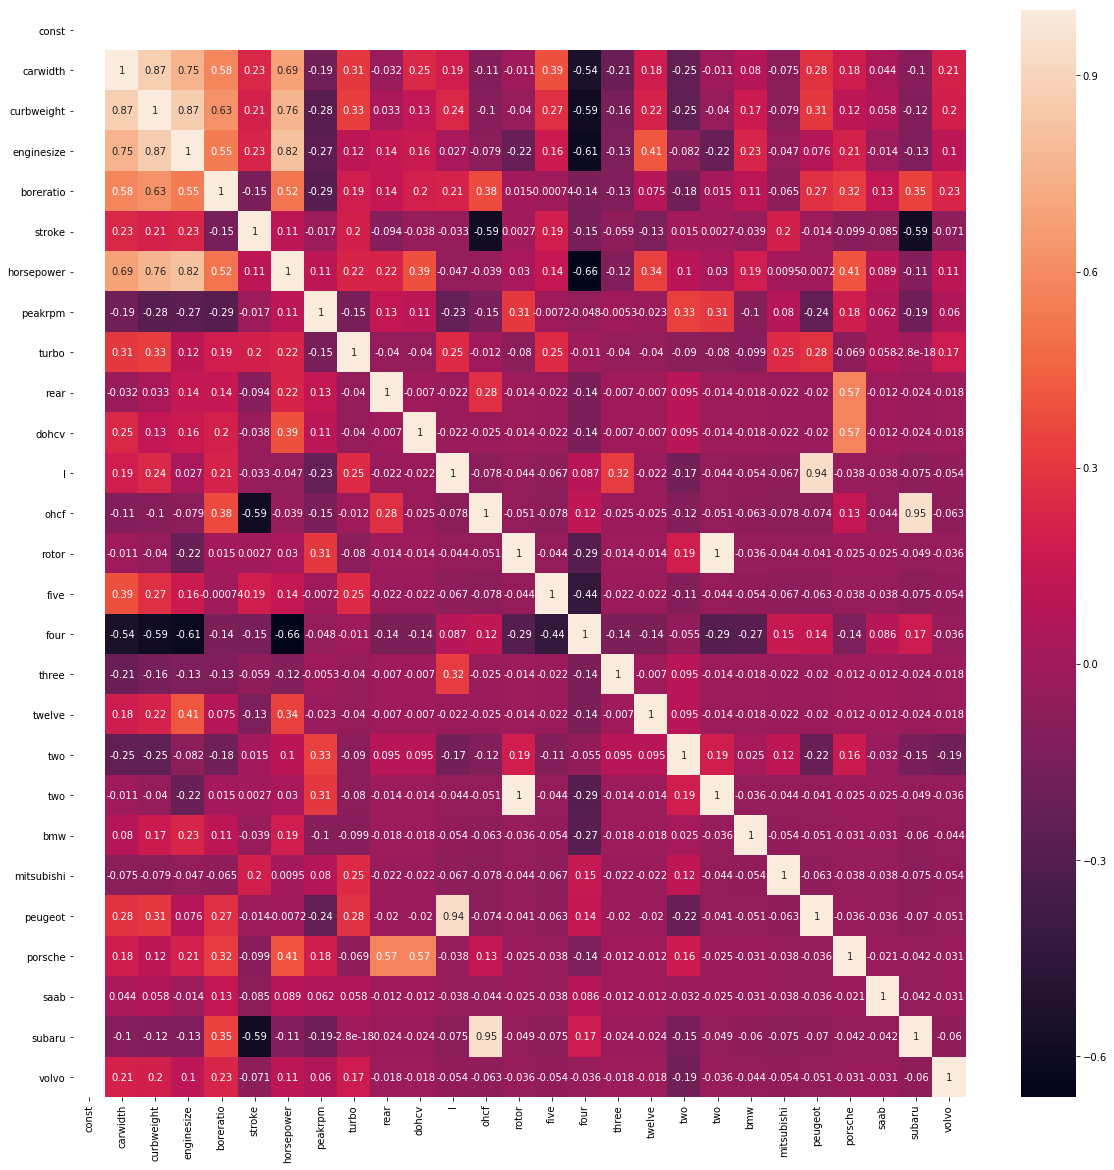

In [286]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation_x_train,
           xticklabels=correlation_x_train.columns.values,
           yticklabels=correlation_x_train.columns.values,annot= True)
plt.show()

#### As we can see directly from the heatmap, l and Peugeot, subaru and ohcf, two and rotor  are highly correlated.

#### 1) Could be that all Peugeot engines uses l type engine . Therefore we will drop l directly.

####  2) Could be all Subaru engines use ohcf engines. Therefore we will drop ohcf directly

#### 3) It looks all Cars using rotor type engines have 2 doors. Therefore we will drop rotor also

In [287]:
x_train_new = x_train_rfe.drop(['l','ohcf','rotor'],axis=1)
x_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'turbo', 'rear', 'dohcv', 'five', 'four',
       'three', 'twelve', 'two', 'two', 'bmw', 'mitsubishi', 'peugeot',
       'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

#### 5) Creating next model by removing these (Model 2)

In [288]:
x_train_rfe = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

X = x_train_new

vif=vif.iloc[0:0]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print('')
print('VIF results')
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.25e-70
Time:                        23:02:13   Log-Likelihood:                 242.96
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                     119   BIC:                            -366.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3167      0.043     -7.449      0.0

#### There are still correlated variables. But lets remove the insignificant ones first.

#### In this case, 'two' is least significant and we have to remove those

#### 6)  Function created  to drop variables and calculate statistics as this is a repeatetive process

In [289]:
def drop_checkstats(col):
    global x_train_new 
    global x_train_rfe
    global vif
    global lm
    x_train_new=x_train_rfe.drop([col], axis =1)
    x_train_rfe = sm.add_constant(x_train_new)
    lm = sm.OLS(y_train,x_train_rfe).fit()
    print(lm.summary())
    
    X = x_train_new
    #print(X.columns)
    #print(x_train_new.two)
    vif=vif.iloc[0:0]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print('')
    print('VIF results')
    print(vif)

#### Model 3

In [290]:
#x_train_new=x_train_rfe.drop(['two'], axis =1)
drop_checkstats('two')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     76.57
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-59
Time:                        23:02:26   Log-Likelihood:                 207.10
No. Observations:                 143   AIC:                            -370.2
Df Residuals:                     121   BIC:                            -305.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1292      0.046     -2.793      0.0

#### Boreratio has high p values.Therefore dropping it

#### Model 4

In [291]:
drop_checkstats('boreratio')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     81.05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.21e-60
Time:                        23:02:35   Log-Likelihood:                 207.09
No. Observations:                 143   AIC:                            -372.2
Df Residuals:                     122   BIC:                            -310.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1296      0.046     -2.821      0.0

#### twelve has high p values, but has less VIF values.
Regardless, it is insignificant.
Dropping that.

#### Model 5

In [292]:
drop_checkstats('twelve')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     85.98
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.31e-61
Time:                        23:02:40   Log-Likelihood:                 207.07
No. Observations:                 143   AIC:                            -374.1
Df Residuals:                     123   BIC:                            -314.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1300      0.046     -2.844      0.0

#### saab has high p values which still shows insignificance. Dropping that

#### Model 6

In [293]:
drop_checkstats('saab')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     91.36
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.47e-62
Time:                        23:02:45   Log-Likelihood:                 206.97
No. Observations:                 143   AIC:                            -375.9
Df Residuals:                     124   BIC:                            -319.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1327      0.045     -2.938      0.0

#### dohcv has high p values

#### Model 7

In [294]:
drop_checkstats('dohcv')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     97.26
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.70e-63
Time:                        23:02:49   Log-Likelihood:                 206.79
No. Observations:                 143   AIC:                            -377.6
Df Residuals:                     125   BIC:                            -324.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1321      0.045     -2.935      0.0

#### Dropping five as it has high p values

#### Model 8

In [295]:
drop_checkstats('five')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.97e-64
Time:                        23:02:53   Log-Likelihood:                 206.11
No. Observations:                 143   AIC:                            -378.2
Df Residuals:                     126   BIC:                            -327.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1372      0.045     -3.061      0.0

#### volvo has high p value. Therefore dropping that

#### Model 9

In [296]:
drop_checkstats('volvo')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.17e-65
Time:                        23:02:59   Log-Likelihood:                 205.40
No. Observations:                 143   AIC:                            -378.8
Df Residuals:                     127   BIC:                            -331.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1313      0.045     -2.946      0.0

#### Here four has high p values. Therefore we need to drop them

#### Model 10

In [297]:
drop_checkstats('four')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.42e-65
Time:                        23:03:02   Log-Likelihood:                 204.15
No. Observations:                 143   AIC:                            -378.3
Df Residuals:                     128   BIC:                            -333.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1766      0.033     -5.365      0.0

#### Horsepower has high p values as well as high VIF. On checking in correlation matrix, it shows high correlation with engine size.


#### As engine size is more important Business related parameter to price, we are dropping horsepower

#### Model 11

In [298]:
drop_checkstats('horsepower')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.77e-66
Time:                        23:03:06   Log-Likelihood:                 202.64
No. Observations:                 143   AIC:                            -377.3
Df Residuals:                     129   BIC:                            -335.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1636      0.032     -5.085      0.0

#### porsche shows high p values while relatively less VIF values. Therefore dropping that

#### Model 12

In [299]:
drop_checkstats('porsche')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.72e-66
Time:                        23:03:15   Log-Likelihood:                 201.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     130   BIC:                            -337.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1666      0.032     -5.147      0.0

#### Now curbweight and enginesize still shows high VIF. Therefore we might need to take care of them both

#### For now, dropping curbweight first.

#### Model 13

In [300]:
drop_checkstats('curbweight')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.07e-63
Time:                        23:03:19   Log-Likelihood:                 191.21
No. Observations:                 143   AIC:                            -358.4
Df Residuals:                     131   BIC:                            -322.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1535      0.034     -4.463      0.0

#### Conclusion

#### Finally we have all variables under required p values and VIF values. Now we can move ahead to residual data analysis

In [301]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.07e-63
Time:                        23:03:24   Log-Likelihood:                 191.21
No. Observations:                 143   AIC:                            -358.4
Df Residuals:                     131   BIC:                            -322.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1535      0.034     -4.463      0.0

### [VI] Residual Data Analysis

In [302]:
y_train_price = lm.predict(x_train_new)

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

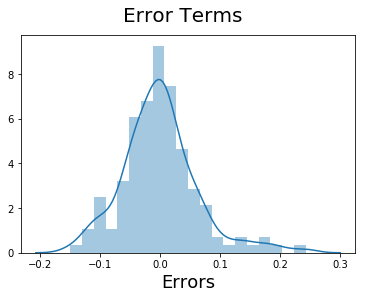

In [304]:
fig = plt.figure()
sns.distplot((y_train - y_train_price),bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### The final distribution almost resembles a normal distribution.

### [VII] Making Predictions

#### 1) Applying the scaling on the test sets

In [305]:
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [306]:
y_test = df_test.pop('price')
x_test = df_test

In [307]:
x_train_new.drop("const", axis=1,inplace=True)

In [308]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

In [309]:
y_pred = lm.predict(x_test_new)

###  R - squared evaluation

In [310]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9012078595100171

#### R - squared value is 0.901 for this model

### [VIII] Model Evaluation

Text(0, 0.5, 'y_pred')

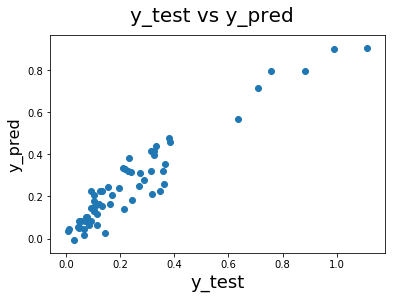

In [311]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

#### Conclusion

#### The above graph shows that the predicted and actual values are almost same which makes the model a good model